In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load in data
opa_metadata = pd.read_csv('../../results/opa_metadata_locus.csv', index_col = 0)
opa_metadata.dropna(subset = 'id', inplace = True, ignore_index = True)
opa_metadata['locus'].fillna(value = 'Other', inplace = True)

# opa_clusters = pd.read_csv('../data/mcl/mcl_clusters.csv', index_col = 0)
# opa_metadata = opa_metadata.merge(opa_clusters, on = 'id', how = 'left')

In [3]:
np.unique(opa_metadata['locus'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'Other'],
      dtype=object)

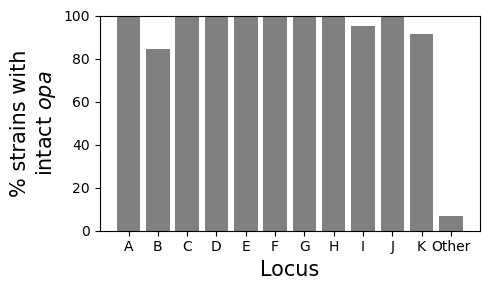

In [ ]:
# Calculate and plot loci occupancy
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'Other']
loci_occupancy = 100*opa_metadata['locus'].value_counts(sort = False)/len(np.unique(opa_metadata['strain']))
loci_occupancy = loci_occupancy[order]

plt.figure(figsize = (5,3))
plt.bar(loci_occupancy.index, loci_occupancy.values, color = 'gray')
plt.xlabel('Locus', fontsize = 15)
plt.ylabel('% strains with\nintact $opa$', fontsize = 15)
plt.ylim([0, 100])
plt.tight_layout()
plt.savefig('../../figures/loci/loci_occupany.png', dpi = 300)
plt.savefig('../../figures/loci/loci_occupany.pdf')
plt.show()

In [6]:
print(100-loci_occupancy)

locus
A         0.000000
B        15.525114
C         0.000000
D         0.000000
E         0.456621
F         0.000000
G         0.000000
H         0.000000
I         5.022831
J         0.000000
K         8.675799
Other    93.150685
Name: count, dtype: float64


In [26]:
# Some summary stats

print('Num opa within locally collinear block compared to FA1090 genome: ', (~opa_metadata['ref_lcb_start'].isnull()).sum(), '/', len(opa_metadata))
print('Number of opa not defined in any locus: ', len(opa_metadata[opa_metadata['locus'] == 'Other']))
print('Note that about half of these were found to be a locally collinear block and thus opa location could have jumped')

Num opa within locally collinear block compared to FA1090 genome:  2331 / 2359
Number of opa not defined in any locus:  15
Note that about half of these were found to be a locally collinear block and thus opa location could have jumped


In [27]:
opa_metadata[opa_metadata['locus'] == 'Other']

,chromosome,strand,start_cr,stop_cr,start_term,stop_term,start,stop,n_terminus,id,...,ref_lcb_strand,query_lcb_start,query_lcb_stop,query_lcb_strand,length_ratio,start_reordered,start_reordered_flipped,strand_flipped,strain,locus
174,NZ_CP106767.1,-1,2103519.0,2103589.0,2102790.0,2102808.0,2102791.0,2103614.0,2103505.0,10610_opa_10,...,NaN,NaN,NaN,NaN,NaN,2102791.0,2102791.0,-1.0,10610,Other
239,NZ_CP106805.1,1,1534671.0,1534681.0,1535413.0,1535431.0,1534646.0,1535430.0,1534695.0,10743_opa_8,...,1.0,1144290.0,1535194.0,-1.0,0.988128,460852.0,75671.0,-1.0,10743,Other
340,NZ_CP107271.1,-1,495628.0,495693.0,494890.0,494908.0,494891.0,495718.0,495614.0,1123850_opa_3,...,NaN,NaN,NaN,NaN,NaN,494891.0,494891.0,-1.0,1123850,Other
632,NZ_CP097846.1,1,1790871.0,1790936.0,1791680.0,1791698.0,1790846.0,1791697.0,1790950.0,AT159_opa_9,...,1.0,1677678.0,1797376.0,-1.0,0.992398,181324.0,75496.0,-1.0,AT159,Other
654,1,1,1515250.0,1515350.0,1516082.0,1516100.0,1515225.0,1516099.0,1515364.0,AUNG1065_opa_7,...,1.0,1120181.0,1521807.0,-1.0,0.994829,461903.0,75450.0,-1.0,AUNG1065,Other
804,1,1,1737099.0,1737159.0,1737882.0,1737900.0,1737074.0,1737899.0,1737173.0,CCC028_opa_10,...,NaN,NaN,NaN,NaN,NaN,1737074.0,1737074.0,1.0,CCC028,Other
885,1,1,1453026.0,1453076.0,1453790.0,1453808.0,1453001.0,1453807.0,1453090.0,DDD029_opa_9,...,1.0,1341953.0,1453359.0,-1.0,1.009856,187484.0,75704.0,-1.0,DDD029,Other
907,1,1,1453087.0,1453142.0,1453856.0,1453874.0,1453062.0,1453873.0,1453156.0,DDD034_opa_9,...,1.0,1342015.0,1453171.0,-1.0,1.009869,187736.0,75703.0,-1.0,DDD034,Other
918,1,1,1452193.0,1452243.0,1452957.0,1452975.0,1452168.0,1452974.0,1452257.0,DDD038_opa_9,...,1.0,1340948.0,1452421.0,-1.0,1.010307,187813.0,75703.0,-1.0,DDD038,Other
1388,1,1,1348548.0,1348593.0,1349298.0,1349316.0,1348523.0,1349315.0,1348607.0,GCGS0245_opa_8,...,NaN,NaN,NaN,NaN,NaN,1348523.0,1348523.0,1.0,GCGS0245,Other
